<a href="https://colab.research.google.com/github/shruti629/Deep-Health-Analysis-and-Disease-Prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Attribute Information:

1.) age

2.) sex

3.) chest pain type (4 values)

4.) resting blood pressure

5.) serum cholestoral in mg/dl

6.) fasting blood sugar > 120 mg/dl

7.) resting electrocardiographic results (values 0,1,2)

8.) maximum heart rate achieved

9.) exercise induced angina

10.) oldpeak = ST depression induced by exercise relative to rest

11.) the slope of the peak exercise ST segment

12.) number of major vessels (0-3) colored by flourosopy

13.) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

Import important library

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [14]:
from pathlib import Path
import pandas as pd

path = Path("D:/Deep-Health-Analysis-and-Disease-Prediction/notebooks/data/heart.csv")
ht = pd.read_csv(path)

In [15]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
ht.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
ht.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Feature Section**

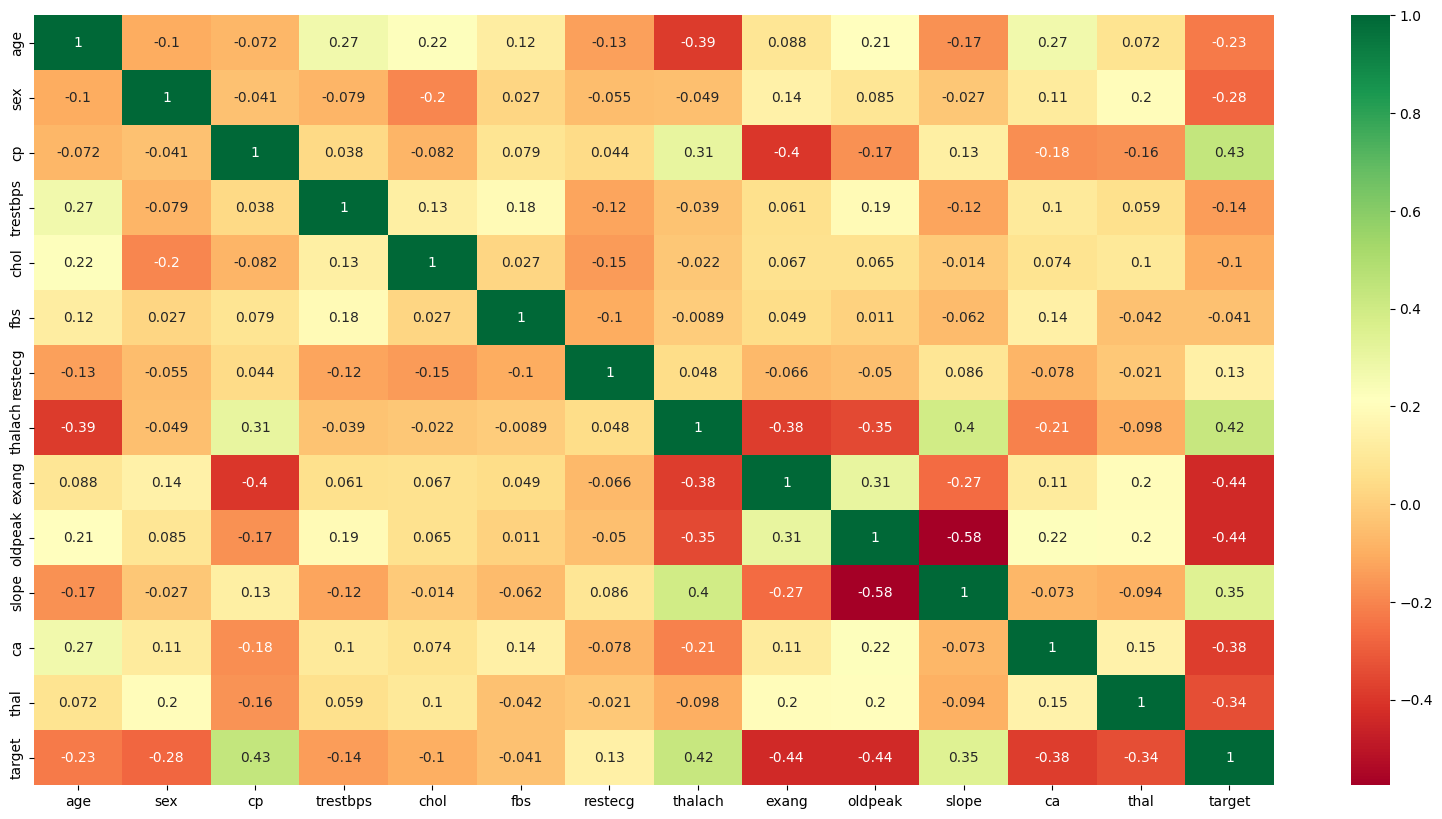

In [18]:
ht.corr()
plt.figure(figsize=(20,10))
hp=sns.heatmap(ht.corr(),annot=True,cmap='RdYlGn')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

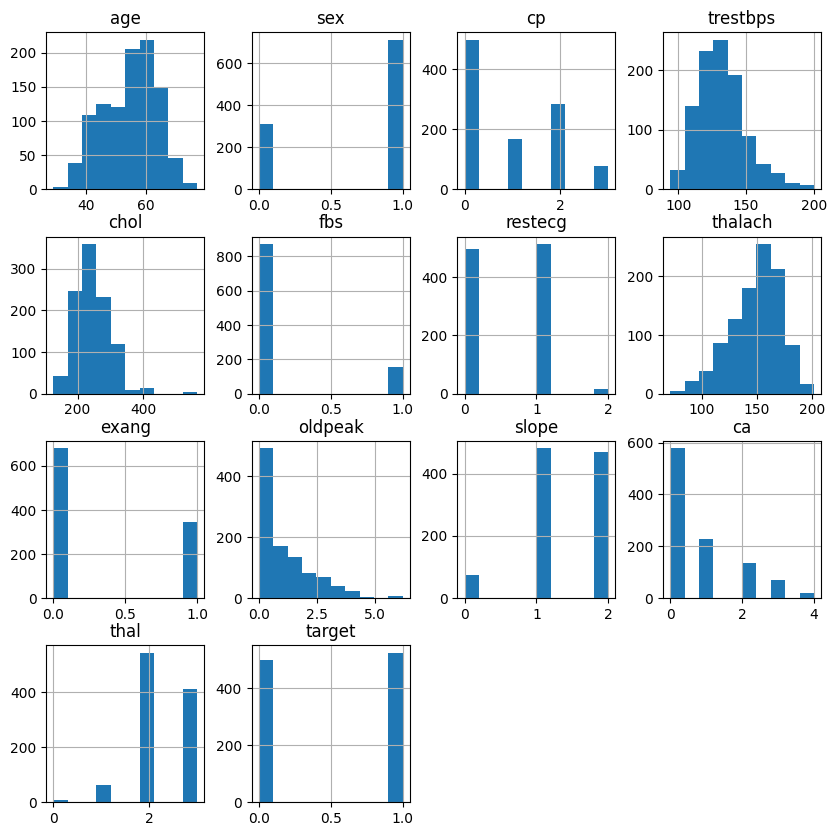

In [19]:
ht.hist(figsize=(10,10))

C:\Users\hp\AppData\Local\Temp\ipykernel_45404\3392911318.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=ht,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

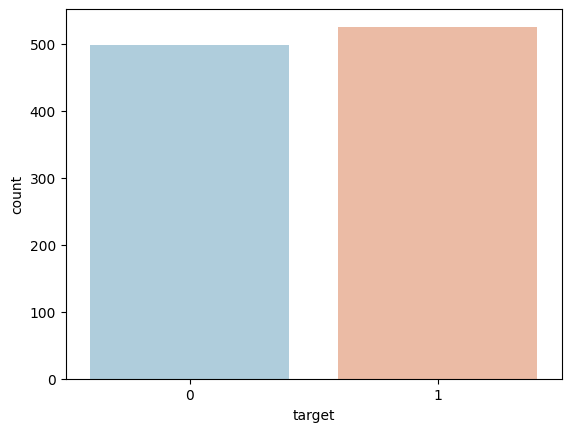

In [20]:
sns.countplot(x='target',data=ht,palette='RdBu_r')

In [21]:
ht.replace({'Sex': {0: 'Female', 1: 'Male'}}, inplace=True)
ht.replace({'Target': {0: 'Clean', 1:'Disease'}}, inplace=True)

In [22]:
ht

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


Data Visualization

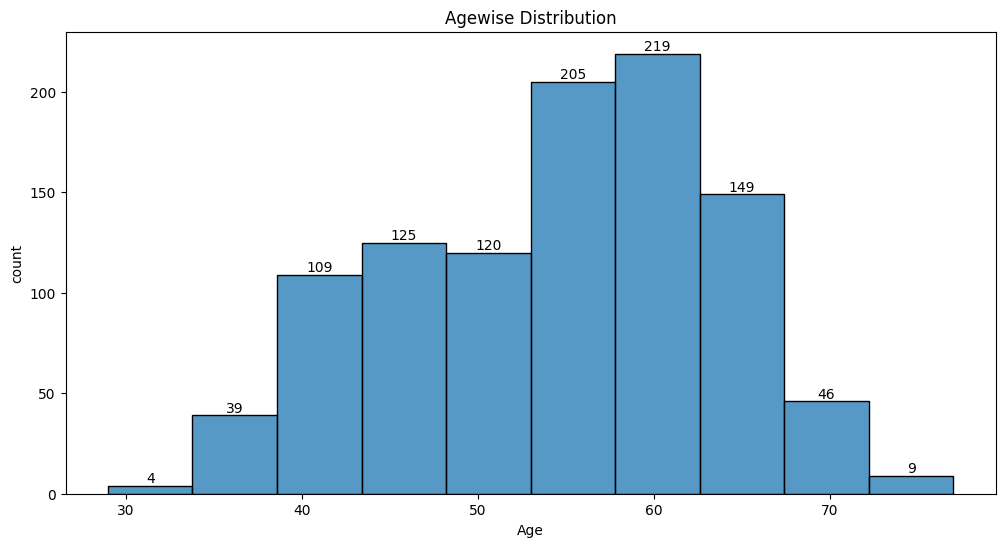

In [23]:
plt.figure(figsize=(12,6))
ax=sns.histplot(x=ht['age'],bins=10)
plt.title('Agewise Distribution')
plt.xlabel('Age')
plt.ylabel('count')
for lab in ax.containers:
    ax.bar_label(lab)

Text(0, 0.5, 'thalach')

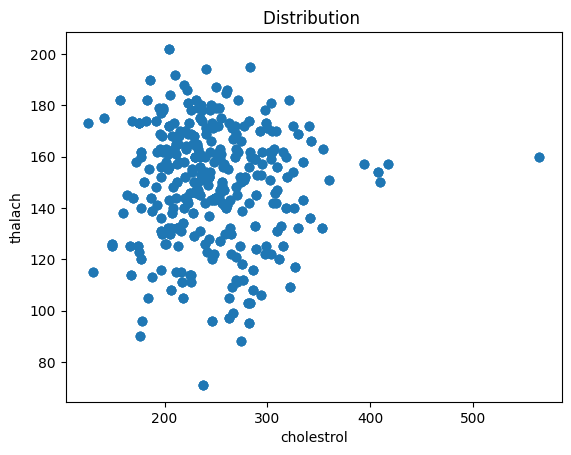

In [24]:
plt.scatter(x=ht['chol'],y=ht['thalach'])
plt.title('Distribution ')
plt.xlabel('cholestrol')
plt.ylabel('thalach')

In [25]:
#standardization
#scaler= StandardScaler()
#columns =['age','trestbps',	'chol'	,'thalach'	,'oldpeak']
#ht[columns]= scaler.fit_transform(ht[columns])

In [26]:
ht

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [27]:
# Creating Features (X) and Target (y) variables
X = ht.drop(columns='target', axis=1)
y = ht['target']

In [28]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [29]:
#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


K-Neighbhour classifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test))

0.6780487804878049


In [31]:
# Train and evaluate KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy:  0.6780487804878049
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68       102
           1       0.68      0.68      0.68       103

    accuracy                           0.68       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.68      0.68      0.68       205



Random Forest classifier

In [32]:
rand_classifier=RandomForestClassifier(random_state=42)
score=cross_val_score(rand_classifier,X,y,cv=10)

In [33]:
rand_classifier.fit(X_train, y_train)
y_pred_rf = rand_classifier.predict(X_test)

print(y_pred_rf)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]


In [34]:
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy:  0.9853658536585366
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



 Decision Tree Classifier

In [35]:
dt_classifier=DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print(y_pred_dt)
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0]
Decision Tree Accuracy:  0.9853658536585366
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Bulid the predictive system

In [38]:
input_data=(62,0,0,140,268,0,0,160,0,3,6,0,2) # Removed the extra feature

#change input data to numpy array
input_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_numpy_array.reshape(1,-1)

prediction = rand_classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print("The person does not have a Heart disease")
else:
  print("The Person has Heart Disease")

[1]
The Person has Heart Disease


d:\Deep-Health-Analysis-and-Disease-Prediction\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [40]:
pickle.dump(rand_classifier, open('heart_saved.pkl', 'wb'))